In [1]:
import numpy as np
import pandas as pd
from app2 import *

['0ngwQpVCEUhKingLoOpd1I', '7zGVMRHuPm0JudlT5kgWog', '2o081YaHjPiDIgOtIyw8Hp', '1qbUsgOaOMDB7UYNQKFBSZ', '7BP5onQdR6vqqa78qT9AgV', '2NebeZvLy2MsWKiAFk6R7o']
0ngwQpVCEUhKingLoOpd1I
41
7zGVMRHuPm0JudlT5kgWog
35
2o081YaHjPiDIgOtIyw8Hp
1qbUsgOaOMDB7UYNQKFBSZ
7BP5onQdR6vqqa78qT9AgV
100
2NebeZvLy2MsWKiAFk6R7o
89


In [2]:
print(playlist_namelist)

['Hindi.json', 'Peak Trap.json', 'Frictionless.json', "I'm a god.json"]


In [3]:
def track_lister(list1):
    list2 = []
    track_list = []
    for i in range(len(list1)):
        list2.append(list1[i][:-5])
    for item in list2:
        if "'" in item:
            item = item.replace("'","")
        if " " in item:
            item = item.replace(" ","_")
        item += "_tracklist"
        track_list.append(item)
    return track_list    

In [4]:
print(track_lister(playlist_namelist))

['Hindi_tracklist', 'Peak_Trap_tracklist', 'Frictionless_tracklist', 'Im_a_god_tracklist']


In [5]:
for i in range(len(playlist_namelist)):
    tracklist = pd.read_json(playlist_namelist[i])
    tracklist = tracklist.set_index("id")
    tracklist = tracklist.drop(["analysis_url","track_href","uri","type"],1)
    tracklist["playlist"] = playlist_namelist[i][:-5]
    if i == 0:
        all_tracks = tracklist
    else:
        all_tracks = all_tracks.append(tracklist)
all_tracks.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,playlist
id,,,,,,,,,,,,,,
7ltsfuHdqTZ5LwPpDy1q0v,0.1860,0.786,416613,0.579,0.000000,2,0.1180,-14.913,1,0.1420,90.012,4,0.481,Hindi
0OXQa6GOzxeYWFopEmASw9,0.0493,0.805,425413,0.670,0.000050,2,0.2030,-13.187,1,0.0601,122.992,4,0.916,Hindi
6B58TJqjGLQuuZBhQ3UnEA,0.1200,0.767,309107,0.503,0.000096,9,0.1580,-13.424,1,0.0828,141.996,4,0.483,Hindi
0IYpKZhCeoXB85BslBg3q5,0.4190,0.646,327227,0.908,0.000002,11,0.3810,-4.680,0,0.0988,104.238,4,0.881,Hindi
7CcAKQatXMmlr7wi6BaQsI,0.0815,0.493,297927,0.947,0.009370,1,0.0552,-4.188,0,0.2060,127.986,4,0.568,Hindi


In [6]:
for i in range(len(track_stuff_namelist)):
    track_stuff = pd.read_json(track_stuff_namelist[i])
    track_stuff = track_stuff.T
    track_stuff = track_stuff.set_index("id")
    if i == 0:
        all_tracks_2 = track_stuff
    else:
        all_tracks_2 = all_tracks_2.append(track_stuff)
all_tracks["artist"] = all_tracks_2["artist"]
all_tracks["popularity"] = all_tracks_2["popularity"]
all_tracks["popularity"] = pd.to_numeric(all_tracks["popularity"])
# all_tracks.head()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
peak_trap = all_tracks[all_tracks["playlist"] == "Peak Trap"]
frictionless = all_tracks[all_tracks["playlist"] == "Frictionless"]
im_a_god = all_tracks[all_tracks["playlist"] == "I'm a god"]
hindi = all_tracks[all_tracks["playlist"] == "Hindi"]
color = ["#BAA7B0","#FF9C6A","#F26DF9","#8E6C88"]
sns.set_style("white")
palette = sns.color_palette(color)
sns.set_palette(palette)
print(peak_trap['popularity'].mean())
print(frictionless["popularity"].mean())
print(im_a_god['popularity'].mean())
print(hindi['popularity'].mean())
print(peak_trap['popularity'].describe())
print(frictionless["popularity"].describe())
print(im_a_god['popularity'].describe())
print(hindi['popularity'].describe())

49.114285714285714
65.26
66.32584269662921
35.1219512195122
count    35.000000
mean     49.114286
std      12.109237
min      22.000000
25%      42.000000
50%      50.000000
75%      55.500000
max      76.000000
Name: popularity, dtype: float64
count    100.000000
mean      65.260000
std       10.368581
min       25.000000
25%       60.000000
50%       65.000000
75%       72.250000
max       88.000000
Name: popularity, dtype: float64
count    89.000000
mean     66.325843
std      13.170020
min      19.000000
25%      62.000000
50%      69.000000
75%      74.000000
max      89.000000
Name: popularity, dtype: float64
count    41.000000
mean     35.121951
std      12.771443
min       0.000000
25%      27.000000
50%      35.000000
75%      45.000000
max      53.000000
Name: popularity, dtype: float64


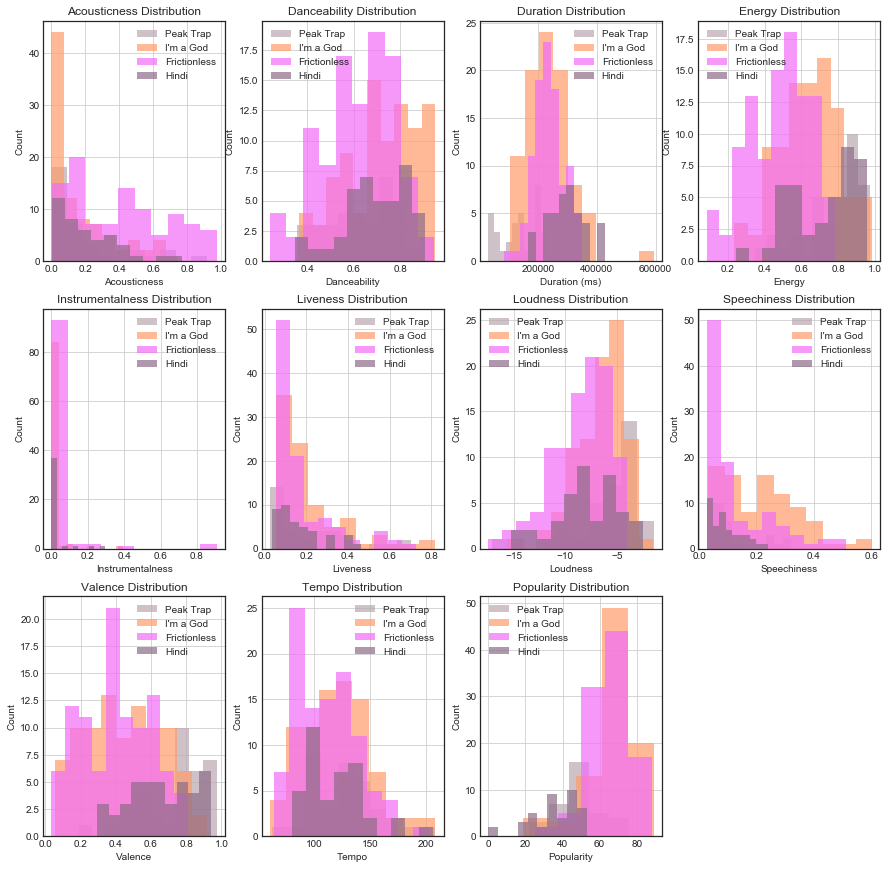

In [8]:
fig = plt.figure(figsize = (15,15))

# Acousticness Distribution
ax1 = fig.add_subplot(3,4,1)
ax1.set_xlabel("Acousticness")
ax1.set_ylabel("Count")
ax1.set_title("Acousticness Distribution")
peak_trap['acousticness'].hist(alpha = .7, label = "Peak Trap")
im_a_god['acousticness'].hist(alpha = .7, label = "I'm a God")
frictionless['acousticness'].hist(alpha = .7, label = "Frictionless")
hindi['acousticness'].hist(alpha = .7, label = "Hindi")
ax1.legend()
# Danceability Distribution
ax2 = fig.add_subplot(3,4,2)
ax2.set_xlabel("Danceability")
ax2.set_ylabel("Count")
ax2.set_title("Danceability Distribution")
peak_trap['danceability'].hist(alpha = .7, label = "Peak Trap")
im_a_god['danceability'].hist(alpha = .7, label = "I'm a God")
frictionless['danceability'].hist(alpha = .7, label = "Frictionless")
hindi['danceability'].hist(alpha = .7, label = "Hindi")
ax2.legend()
# Duration Distribution
ax3 = fig.add_subplot(3,4,3)
ax3.set_xlabel("Duration (ms)")
ax3.set_ylabel("Count")
ax3.set_title("Duration Distribution")
peak_trap['duration_ms'].hist(alpha = .7, label = "Peak Trap")
im_a_god['duration_ms'].hist(alpha = .7, label = "I'm a God")
frictionless['duration_ms'].hist(alpha = .7, label = "Frictionless")
hindi['duration_ms'].hist(alpha = .7, label = "Hindi")
ax3.legend()
# Energy Distribution
ax4 = fig.add_subplot(3,4,4)
ax4.set_xlabel("Energy")
ax4.set_ylabel("Count")
ax4.set_title("Energy Distribution")
peak_trap['energy'].hist(alpha = .7, label = "Peak Trap")
im_a_god['energy'].hist(alpha = .7, label = "I'm a God")
frictionless['energy'].hist(alpha = .7, label = "Frictionless")
hindi['energy'].hist(alpha = .7, label = "Hindi")
ax4.legend()
# Instrumentalness Distribution
ax5 = fig.add_subplot(3,4,5)
ax5.set_xlabel("Instrumentalness")
ax5.set_ylabel("Count")
ax5.set_title("Instrumentalness Distribution")
peak_trap['instrumentalness'].hist(alpha = .7, label = "Peak Trap")
im_a_god['instrumentalness'].hist(alpha = .7, label = "I'm a God")
frictionless['instrumentalness'].hist(alpha = .7, label = "Frictionless")
hindi['instrumentalness'].hist(alpha = .7, label = "Hindi")
ax5.legend()
# Liveness Distribution
ax6 = fig.add_subplot(3,4,6)
ax6.set_xlabel("Liveness")
ax6.set_ylabel("Count")
ax6.set_title("Liveness Distribution")
peak_trap['liveness'].hist(alpha = .7, label = "Peak Trap")
im_a_god['liveness'].hist(alpha = .7, label = "I'm a God")
frictionless['liveness'].hist(alpha = .7, label = "Frictionless")
hindi['liveness'].hist(alpha = .7, label = "Hindi")
ax6.legend()
# Loudness Distribution
ax7 = fig.add_subplot(3,4,7)
ax7.set_xlabel("Loudness")
ax7.set_ylabel("Count")
ax7.set_title("Loudness Distribution")
peak_trap['loudness'].hist(alpha = .7, label = "Peak Trap")
im_a_god['loudness'].hist(alpha = .7, label = "I'm a God")
frictionless['loudness'].hist(alpha = .7, label = "Frictionless")
hindi['loudness'].hist(alpha = .7, label = "Hindi")
ax7.legend()
# Speechiness Distribution
ax8 = fig.add_subplot(3,4,8)
ax8.set_xlabel("Speechiness")
ax8.set_ylabel("Count")
ax8.set_title("Speechiness Distribution")
peak_trap['speechiness'].hist(alpha = .7, label = "Peak Trap")
im_a_god['speechiness'].hist(alpha = .7, label = "I'm a God")
frictionless['speechiness'].hist(alpha = .7, label = "Frictionless")
hindi['speechiness'].hist(alpha = .7, label = "Hindi")
ax8.legend()
# Valence Distribution
ax9 = fig.add_subplot(3,4,9)
ax9.set_xlabel("Valence")
ax9.set_ylabel("Count")
ax9.set_title("Valence Distribution")
peak_trap['valence'].hist(alpha = .7, label = "Peak Trap")
im_a_god['valence'].hist(alpha = .7, label = "I'm a God")
frictionless['valence'].hist(alpha = .7, label = "Frictionless")
hindi['valence'].hist(alpha = .7, label = "Hindi")
ax9.legend()
# Tempo Distribution
ax10 = fig.add_subplot(3,4,10)
ax10.set_xlabel("Tempo")
ax10.set_ylabel("Count")
ax10.set_title("Tempo Distribution")
peak_trap['tempo'].hist(alpha = .7, label = "Peak Trap")
im_a_god['tempo'].hist(alpha = .7, label = "I'm a God")
frictionless['tempo'].hist(alpha = .7, label = "Frictionless")
hindi['tempo'].hist(alpha = .7, label = "Hindi")
ax10.legend()
# Popularity Distribution
ax11 = fig.add_subplot(3,4,11)
ax11.set_xlabel("Popularity")
ax11.set_ylabel("Count")
ax11.set_title("Popularity Distribution")
peak_trap['popularity'].hist(alpha = .7, label = "Peak Trap", bins = 5)
im_a_god['popularity'].hist(alpha = .7, label = "I'm a God", bins = 5)
frictionless['popularity'].hist(alpha = .7, label = "Frictionless", bins = 5)
hindi['popularity'].hist(alpha = .7, label = "Hindi")
ax11.legend()

In [77]:
main_tracks = all_tracks[all_tracks["playlist"] != "Hindi"]
features = main_tracks.drop(["playlist","duration_ms","instrumentalness","valence","liveness","key","time_signature","mode","tempo","artist"],1)
labels = main_tracks["playlist"]
features

,acousticness,danceability,energy,loudness,speechiness,popularity
id,,,,,,
4LwrgltRSrddxeyhIPSoqa,0.301000,0.667,0.740,-6.406,0.0314,54
3K01q0jtSNHeqx5gs97HH2,0.011200,0.814,0.900,-3.318,0.0605,50
7e8gFGk8VXcc8BmkaN58l4,0.007310,0.711,0.861,-4.863,0.1060,37
0oo5zVjH4CyTsm5FctRlnL,0.094000,0.628,0.873,-5.690,0.0355,37
5U4wYRHrCRxRP6iQfM824C,0.075200,0.795,0.784,-5.933,0.0983,50
4Cd01GWLuMTNZhW0DE7cF4,0.164000,0.714,0.946,-3.540,0.0890,48
5lEsM6qpuzuZwij6jIZPvP,0.027300,0.599,0.888,-2.931,0.0514,57
10xcIQQEJSEIOgG1HvS3t9,0.005770,0.614,0.919,-3.011,0.0413,52
1GBknQ67DCfKTPms1dw9EW,0.070300,0.593,0.970,-4.187,0.0716,60


In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [79]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .15, random_state = 0)
features_train_pca = pca.transform(features_train)
features_test_pca = pca.transform(features_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
clf.fit(features_train_pca,labels_train)
pred = clf.predict(features_test_pca)

In [81]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, pred, average = 'weighted'))

0.6519607843137255


In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30, min_samples_split = 5, min_samples_leaf = 5)
clf.fit(features_train_pca, labels_train)
pred = clf.predict(features_test_pca)

In [83]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, pred, average = 'weighted'))

0.5171014107000266
